<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP3_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP3-1_KNN

In [1]:
# Importo librerias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from numpy.random import randn

In [2]:
# Cargo dataset 
bi_df =  pd.read_csv("https://raw.githubusercontent.com/disenodc/MachineLearning_UNS/main/bidimension.csv")

bi_df

,Etiqueta,x,y
0,A,9,4
1,A,31,2
2,B,2,3
3,B,11,4
4,A,31,4
...,...,...,...
995,A,38,3
996,B,31,3
997,B,17,2
998,A,16,1


In [3]:
x = bi_df[['x','y']].values
y = bi_df['Etiqueta'].values

In [4]:
# Separo los conjuntos en entrenamiento y prueba
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print(bi_df.groupby('Etiqueta').size())


Etiqueta
A    489
B    511
dtype: int64


Hacer FOR variando K y 

EL valor maximo -> valor K optimo = mayor score

Entrenar otro modelo K optimo

Matriz de confusion

In [6]:
# Entreno el modelo

X, y = bi_df.x , bi_df.y

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
#calculando precision del modelo
knn.score(X_train, y_train)

0.6675

In [8]:
#Calculo la precision del modelo
print(knn.score(X_test, y_test))

0.495


([<matplotlib.axis.XTick at 0x7fee3c600f10>,
 <a list of 5 Text major ticklabel objects>)

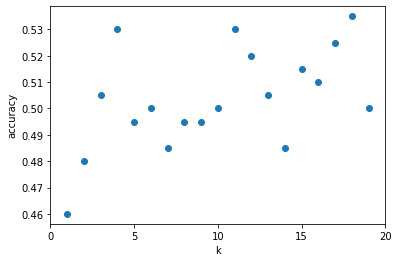

In [9]:
# Elegir el mejor valor de k y graficar score en funcion

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

  


In [10]:
#Prediccion Confusion Matrix

prediccion = knn.predict(X_test)

print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion))

print(prediccion)

[[47 51]
 [49 53]]
              precision    recall  f1-score   support

           A       0.49      0.48      0.48        98
           B       0.51      0.52      0.51       102

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

['B' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'A'
 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'A'
 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B'
 'B' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'A' 'B' 'B'
 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'B'
 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'B'
 'B' 'A' 'A' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A'
 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B' 'B' 'B' 'A' 'B' 'B' 'A'
 'B' 'B' 'A' 'B' 'A' 'B' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'A' 'A' 'A' '

In [14]:
#reviso correlacion
bi_data_corr = bi_df.corr()

bi_data_corr

,x,y
x,1.000000,0.010041
y,0.010041,1.000000


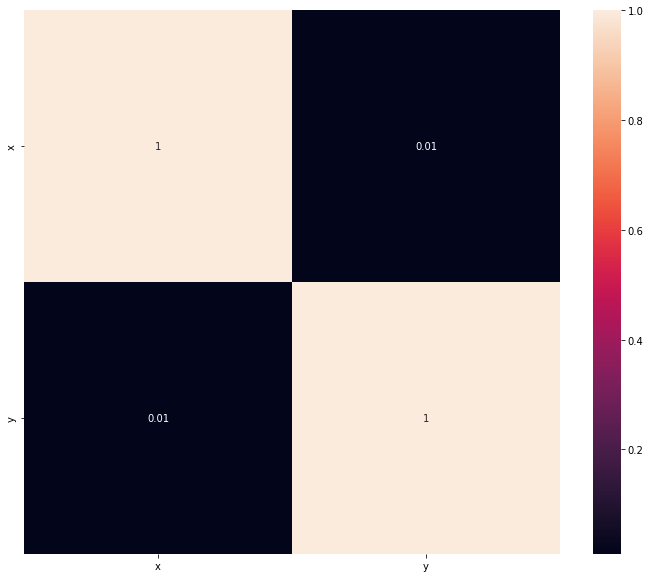

In [13]:
# Matriz de confusion

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(bi_data_corr, annot=True);
